# Plasmid heterozygosis: single-cell microfluidics data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
import pathlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import HTML, display
import csv
import pandas as pd

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble']="\\usepackage{subdepth},\\usepackage{type1cm}"

print("> Python libraries imported")

> Python libraries imported


In [2]:
#sys.path.insert(0, '/Users/ESB/RPM_SYNC/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')

from AnalysisFunctions import *
from PlottingFunctions import *

> Analysis Functions loaded
Importing readroi
DataStructs...loaded!
DataManagers...loaded!
PlottingFunctions... loaded!


In [3]:
#workingDir='/home/charly/Lab/Projects/uJ/local/experiments/HT-CAZ/' #local
#os.chdir(workingDir)

In [4]:
pwd()

'/home/esb/Projects/uJ/local/experiments_ms/HT-CAZ'

In [5]:
## User-defined parameters

## User-defined parameters

expeLabel="HT-CAZ"
list_pos="xy07,xy08,xy09,xy12,xy13,xy17,xy26,xy27,xy32,xy34".split(",")  
list_pos="xy07,xy08,xy09,xy12,xy13,xy14,xy15,xy17,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32,xy33,xy34,xy35,xy36".split(",")

rootDir="../../data_sample/HT-CAZ/"

#rootDir="/home/esb/Projects/uJ/uJ_data/HT-Ramps/HT13-CAZ/"
#rootDir="/home/charly/Lab/Projects/uJ/local/data_sample/HT13-CAZ/"
#rootDir="/home/esb/Projects/uJ/uJ_master/data_sample/HT13-Sine-2hr/"

#toFile=False
toFile=True

#Parameters 

frame2min=10

notcaptured_start=170
notcaptured_end=170


frame_experiment_start=37;
frame_signal_start=int(91-(frame_experiment_start-1)/2)
frame_signal_end=int(127-(frame_experiment_start-1)/2)
#frame_experiment_end=int(145-(frame_experiment_start-1)/2)
#frame_experiment_end=int(163-(frame_experiment_start-1)/2)
#frame_experiment_end=163

#frame_experiment_end=145
frame_experiment_start=37;
frame_signal_start=int(91-(frame_experiment_start-1)/2)
frame_signal_end=int(127-(frame_experiment_start-1)/2)
frame_experiment_end=int(145-(frame_experiment_start-1)/2)
frame_experiment_end=163

frame_experiment_start=37;
frame_signal_start=91
frame_signal_end=127
frame_experiment_end=127
#frame_experiment_end=145
#frame_experiment_end=163
frame_experiment_start=55;
frame_signal_start=91
frame_signal_end=127
frame_experiment_end=127


print("frame_experiment_start: ",frame_experiment_start)
print("frame_signal_start: ",frame_signal_start)
print("frame_signal_end: ",frame_signal_end)
print("frame_experiment_end: ",frame_experiment_end)


t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
frames_list=[x for x in frames]

times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("\nFrame list:  %s"%(frames_list))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_signal_start=%s\t(%sh)"%(t_signal_start,t_signal_start/60))
print("t_signal_end=%s\t(%sh)"%(t_signal_end, t_signal_end/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))


#Prepare file system
dataPath="%sdata/DsRed+GFP/"%rootDir

figurePath="%sfigures/"%rootDir
if not os.path.exists(figurePath) and toFile:
    os.mkdir(figurePath)

normDataPath="%sdata/normData/"%rootDir
if not os.path.exists(normDataPath) and toFile:
    os.mkdir(normDataPath)


    
    
print("\n> Parameters loaded")

frame_experiment_start:  55
frame_signal_start:  91
frame_signal_end:  127
frame_experiment_end:  127

Frames:  range(55, 128)	 0.0->12.0 hours

Frame list:  [55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
t_experiment_start=0	(0.0h)
t_signal_start=360	(6.0h)
t_signal_end=720	(12.0h)
t_experiment_end=720	(12.0h)

> Parameters loaded


In [6]:
print(dataPath,"\n",normDataPath,'\n',list_pos)

../../data_sample/HT-CAZ/data/DsRed+GFP/ 
 ../../data_sample/HT-CAZ/data/normData/ 
 ['xy07', 'xy08', 'xy09', 'xy12', 'xy13', 'xy14', 'xy15', 'xy17', 'xy24', 'xy25', 'xy26', 'xy27', 'xy28', 'xy29', 'xy30', 'xy31', 'xy32', 'xy33', 'xy34', 'xy35', 'xy36']


In [7]:

data_pos=[]
data_frame=[]
data_GFP=[]
data_DsRed=[]
data_phi=[]
data_rho=[]

pop_df_list=[]
loaded_frames=0;
for root, dirs, files in os.walk(dataPath):
    dirs.sort()
    files.sort()
    #print("*",path)
    path = root.split(os.sep)
    if(not path[-1] in list_pos):
        continue
    print(path)
    trap_df_list=[]
    for file in files:
        
        extension=""
        if len(os.path.splitext(file))>0:
            extension=pathlib.Path(file).suffix
        filePath = os.path.join(root,file)
        #print(filePath)
        if extension == ".txt":
            fileframe=file.split('_')[-1].split('.')[0]
            
            if(int(fileframe)>frame_experiment_end):
                continue
            print("%s/%s"%(fileframe,len(files)), end='\r')
            #print("Loading data from: " + file)
            
            data=fromFileData(filePath)
            this_pos=[]
            this_frame=[]
            this_GFP=[]
            this_DsRed=[]
            this_imgGFP=[]
            this_imgDsRed=[]
            this_phi=[]
            this_rho=[]
            this_id=[]
            this_label=[]
            for roi in data:
                this_id.append(int(roi[1]))
                this_imgGFP.append(str(roi[2]))
                this_imgDsRed.append(str(roi[3]))
                this_pos.append(str(roi[4]))
                this_frame.append(int(roi[5]))
                this_label.append(str(roi[6]))
                gfp=float(roi[7])
                dsred=float(roi[8])
                this_GFP.append(gfp)
                this_DsRed.append(dsred)
                
                phi,rho=cart2pol(gfp,dsred)    
                
                this_phi.append(phi)
                this_rho.append(rho)
                
            data_pos.extend(this_pos)
            data_frame.extend(this_frame)
            data_GFP.extend(this_GFP)
            data_DsRed.extend(this_DsRed)
            data_phi.extend(this_phi)
            data_rho.extend(this_rho)
            loaded_frames+=1
    
        trap_pos_df=pd.DataFrame({"pos":this_pos,"frame":this_frame,"id":this_id,"imgGFP":this_imgGFP,"imgDsRed":this_imgDsRed,"label":this_label,"GFP":this_GFP,"DsRed":this_DsRed,"phi":this_phi,"rho":this_rho})        
        trap_df_list.append(trap_pos_df)
    print()
    trap_df=pd.concat(trap_df_list)
    pop_df_list.append(trap_df)

pop_df=pd.concat(pop_df_list)
            
data_frame=np.asarray(data_frame)
data_GFP=np.asarray(data_GFP)
data_DsRed=np.asarray(data_DsRed)
data_phi=np.asarray(data_phi)
data_rho=np.asarray(data_rho) 
data_pos=np.asarray(data_pos)

print("> Data loaded (%s cells from %s images)"%(len(data_GFP), loaded_frames))

['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy07']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy08']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy09']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy12']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy13']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy14']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy15']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy17']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy24']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy25']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy26']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy27']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 'data', 'DsRed+GFP', 'xy28']
127/91
['..', '..', 'data_sample', 'HT-CAZ', 

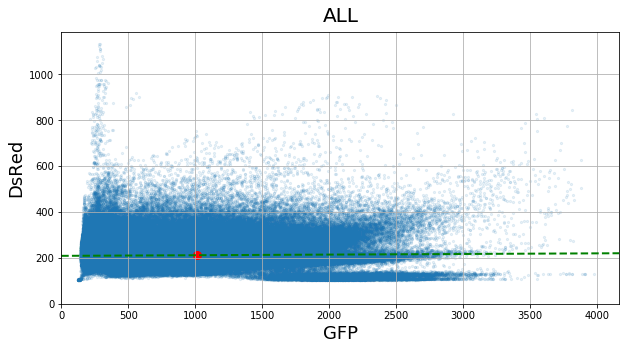

In [8]:
plt=plot_Raw_flourescence(pop_df["GFP"],pop_df["DsRed"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

# for trap in list_pos:
#     trap_df=pop_df[pop_df['pos']==trap].copy()
    
#     plt=plot_Raw_flourescence(trap_df["GFP"],trap_df["DsRed"],trap,"GFP","DsRed",0,0)
#     plt.show()
#     plt.close()


In [9]:
trapDF_list=[]
pop_df_presignal=pop_df[pop_df['frame']<frame_signal_start].copy()
meanGFPp=pop_df_presignal['GFP'].mean()
meanDsRedp=pop_df_presignal['DsRed'].mean()

gfp_max=pop_df['GFP'].max()
rfp_max=pop_df['DsRed'].max()


print("Normalizing flourescence by max per trap and calculating its polar coordinates ")
for trap in list_pos:
    trap_df=pop_df[pop_df['pos']==trap].copy()
    #gfp_max=trap_df['GFP'].max()
    #rfp_max=trap_df['DsRed'].max()
    print(trap, end=' ')

    gfpsN=trap_df["GFP"]/gfp_max
    rfpsN=trap_df["DsRed"]/rfp_max
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    phis=[]
    rhos=[]
    relInt=[]
    absInt=[]
    for this_gfp,this_rfp in zip(gfpsN,rfpsN):
        this_phi,this_rho=cart2pol(this_gfp,this_rfp)
        phis.append(this_phi)
        rhos.append(this_rho)
        rgfp=this_gfp*gfp_max
        rrfp=this_rfp*rfp_max
        ri=((rgfp/meanGFPp)-(rrfp/meanDsRedp))
        relInt.append(ri)
        ai=np.sqrt((rgfp**2)+(rrfp**2))
        absInt.append(ai)


    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"relInt":relInt,"absInt":absInt,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phi_N":phis,"rho_N":rhos})
    trapDF_list.append(trapDF)
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.head()

Normalizing flourescence by max per trap and calculating its polar coordinates 
xy07 xy08 xy09 xy12 xy13 xy14 xy15 xy17 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 xy33 xy34 xy35 xy36 

,pos,frame,id,imgGFP,imgDsRed,label,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N
0,xy07,37,0,HT-CAZ_xy07_GFP_037.tif,HT-CAZ_xy07_DsRed_037.tif,roi_f37_n0_x260_y437,1038.673,196.477,0.186953,1057.092622,0.066365,1057.092622,0.261357,0.173295,0.585501,0.313590
1,xy07,37,1,HT-CAZ_xy07_GFP_037.tif,HT-CAZ_xy07_DsRed_037.tif,roi_f37_n1_x415_y436,526.718,176.487,0.323312,555.499336,-0.320519,555.499336,0.132536,0.155664,0.865476,0.204443
2,xy07,37,2,HT-CAZ_xy07_GFP_037.tif,HT-CAZ_xy07_DsRed_037.tif,roi_f37_n2_x427_y429,447.104,176.630,0.376235,480.728763,-0.395669,480.728763,0.112503,0.155790,0.945361,0.192165
3,xy07,37,3,HT-CAZ_xy07_GFP_037.tif,HT-CAZ_xy07_DsRed_037.tif,roi_f37_n3_x385_y428,513.920,176.043,0.330022,543.235588,-0.330448,543.235588,0.129316,0.155272,0.876354,0.202069
4,xy07,37,4,HT-CAZ_xy07_GFP_037.tif,HT-CAZ_xy07_DsRed_037.tif,roi_f37_n4_x377_y430,583.950,140.283,0.235764,600.563837,-0.100124,600.563837,0.146937,0.123731,0.699873,0.192094


## This section discriminate data by their angle in polar coordinates 
#### Creates a histogram by trap/pos using the bins of the whole population distribution
#### Gives a data frame of data which angles have n element in a bin.


In [10]:

to_check_df_list=[]
n_lim=10  #use 10 for accurate rotation and normalization, 1 for exploring one trap



for angle_type in ["phi","phi_N"]:

    maxPhiT=pop_df_plus[angle_type].max()
    minPhiT=pop_df_plus[angle_type].min()
    phi_range=np.linspace(minPhiT,maxPhiT,100)



    for trap in list_pos:
        trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
#        print(trap, end=" ")

        #### comment this conditional to analize all traps  #####   
    #     if(trap!=to_clean_trap):
    #         continue


        n,bins,patches=plt.hist(trap_df[angle_type],bins=phi_range)
        #plt.show()
        plt.close()

        lows=[]
        tmean=trap_df[angle_type].mean()
        for i,ni in enumerate(n):

            if(ni<=n_lim):
                lows.append(bins[i])
                #print("****",ni,bins[i])


        lefts=[x for x in lows if x<tmean]
        rights=[x for x in lows if x>tmean]
        lt=0
        rt=bins[-1]
        if(len(lefts)>0):
            lt=lefts[-1]
        if(len(rights)>0):
            rt=rights[0]
        #print("Trap %s thresholds: %s\t%s"%(trap,lt,rt))
        to_check_trap_df=trap_df[(trap_df[angle_type]<=lt)|(trap_df[angle_type]>=rt)].copy()
        to_check_df_list.append(to_check_trap_df)
#        print(to_check_trap_df["frame"].tolist())
        #print()

to_check_df=pd.concat(to_check_df_list)

to_check_df.describe()


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N
count,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000,21961.000000
mean,82.944356,261.499294,335.625898,265.759103,0.732782,444.035266,-0.910724,444.035266,0.084452,0.234403,1.235137,0.256022
std,26.558224,150.141154,292.723858,91.869486,0.191802,283.252453,0.523339,283.252453,0.073657,0.081030,0.178576,0.092308
min,37.000000,0.000000,124.953000,103.587000,0.032623,162.929291,-4.958676,162.929291,0.031441,0.091365,0.113896,0.096943
25%,60.000000,132.000000,220.870000,230.865000,0.625576,337.166607,-1.005310,337.166607,0.055577,0.203626,1.194663,0.217799
50%,85.000000,266.000000,279.145000,253.659000,0.738646,388.873114,-0.898552,388.873114,0.070240,0.223731,1.267190,0.238560
75%,107.000000,386.000000,353.158000,276.892000,0.863878,452.202900,-0.792072,452.202900,0.088864,0.244222,1.331768,0.260333
max,127.000000,787.000000,3974.149000,1133.770000,1.331182,3976.264648,3.120701,3976.264648,1.000000,1.000000,1.501211,1.006521


### Subtract the elements of the population data frame

In [11]:
to_check_df.index
pop_df_plus_purged=pop_df_plus.copy()
pop_df_plus_purged.drop(to_check_df.index,axis=0,inplace=True)


## Center mean on $\pi$ and resize data to $[0,\pi]$

In [12]:

pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi=pop_df_plus_presignal['phi'].mean()
rot_theta=np.pi/2- meanPhi


maxPhi=pop_df_plus_purged['phi'].max()
minPhi=pop_df_plus_purged['phi'].min()


maxPhi_rot=maxPhi+rot_theta
minPhi_rot=minPhi+rot_theta
meanPhi_rot=meanPhi+rot_theta

meanRho=pop_df_plus_purged['rho'].mean()
maxRho=pop_df_plus_purged['rho'].max()



minPhi_N=pop_df_plus_purged["phi_N"].min()
maxPhi_N=pop_df_plus_purged["phi_N"].max()
#meanPhi_N=(maxPhi_N-minPhi_N)/2
meanPhi_N=pop_df_plus_presignal["phi_N"].mean()
rot_theta_N=np.pi/2- meanPhi_N
meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N

#print("All:    \t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
#print("All:    \t",minPhi_Nrot,maxPhi_Nrot,meanPhi_Nrot,rot_theta_N,minPhi_N,maxPhi_N)



trapDF_list=[]

for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    print(trap,end=" ")
    
    phis_rot=trap_df['phi']+rot_theta
    rhos=trap_df['rho']
    
    phis01=[]
    
    for this_phi in phis_rot:

        if(this_phi<meanPhi_rot):
            phi01=((this_phi-minPhi_rot)/(meanPhi_rot-minPhi_rot))*np.pi/2
                  
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_rot)/(maxPhi_rot-meanPhi_rot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("*",this_phi)
#         if(phi01==0):
#             print("*",this_phi)

        phis01.append(phi01)
    
    rhos01=rhos/maxRho
    maxRho99=rhos.mean()+4*rhos.std()
    rhos01=rhos/maxRho99 
    
    phis_Nrot=trap_df['phi_N']+rot_theta_N
    rhosN01=trap_df['rho_N']
    maxRhoN99=rhosN01.mean()+4*rhosN01.std()
    #rhosN01=rhosN01/np.max(rhosN01)
    rhosN01=rhosN01/maxRhoN99
    phisN01=[]

    for this_phi in phis_Nrot:

        if(this_phi<meanPhi_Nrot):
            phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("**",this_phi)
#         if(phi01==0):
#             print("**",this_phi)

        phisN01.append(phi01)
    
    
    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"phi_rot":phis_rot,"phi_01":phis01,"rho_01":rhos01,"phi_Nrot":phis_Nrot,"phi_N01":phisN01,"rho_N01":rhosN01})
    trapDF_list.append(trapDF)
print()
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df_plus,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.describe()


xy07 xy08 xy09 xy12 xy13 xy14 xy15 xy17 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 xy33 xy34 xy35 xy36 


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N,phi_rot,phi_01,rho_01,phi_Nrot,phi_N01,rho_N01
count,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000
mean,78.752810,243.339112,1013.751524,211.877013,0.259522,1044.187863,-0.027924,1044.187863,0.255086,0.186878,0.673087,0.325161,1.581264,1.291854,0.432594,1.586928,1.534104,0.524688
std,25.201291,157.242085,434.696955,52.830089,0.189687,417.142863,0.469325,417.142863,0.109381,0.046597,0.249364,0.091643,0.189687,0.519826,0.153761,0.249364,0.554783,0.125769
min,37.000000,0.000000,124.953000,103.587000,0.030333,162.929291,-4.958676,162.929291,0.031441,0.091365,0.105958,0.096943,1.352075,0.000000,0.049384,1.019799,0.000000,0.140033
25%,57.000000,113.000000,760.915000,176.889000,0.163526,784.875272,-0.199155,784.875272,0.191466,0.156018,0.524359,0.260390,1.485268,0.956557,0.345799,1.438200,1.192788,0.439892
50%,78.000000,228.000000,1005.200000,200.510000,0.188634,1024.963370,0.055457,1024.963370,0.252935,0.176852,0.589731,0.310457,1.510376,1.136875,0.442189,1.503572,1.379151,0.518078
75%,100.000000,355.000000,1250.750000,236.163000,0.251254,1269.826527,0.211966,1269.826527,0.314721,0.208299,0.732661,0.372065,1.572996,1.574645,0.530390,1.646502,1.722132,0.600821
max,127.000000,858.000000,3974.149000,1133.770000,1.331182,3976.264648,3.120701,3976.264648,1.000000,1.000000,1.501211,1.214077,2.652924,3.464092,1.979352,2.415052,3.258459,2.421285


In [13]:
pop_df_plus_limits=pop_df_plus_purged.copy()
pop_df_plus_limits=pd.merge(pop_df_plus,pop_df_plus_purged)


## Calculate deviation over mean

In [14]:
pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi01=pop_df_plus_presignal['phi_01'].mean()
meanPhi_N01=pop_df_plus_presignal["phi_N01"].mean()

print(meanPhi,meanPhi_N)

phis=pop_df_plus['phi_01']
phis_N=pop_df_plus['phi_N01']
pos=pop_df_plus['pos']
ids=pop_df_plus['id']
frames=pop_df_plus['frame']


dev_mean=[]
dev_mean_N=[]

for this_phi,this_phiN in zip(phis,phis_N):

    this_dev=(this_phi-meanPhi01)/np.pi

    this_devN=(this_phiN-meanPhi_N01)/np.pi
    
    dev_mean.append(this_dev)
    dev_mean_N.append(this_devN)

tempDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"dev_mean":dev_mean,"dev_mean_N":dev_mean_N})
pop_df_plus=pd.merge(pop_df_plus,tempDF,on=['pos','frame','id'])



pop_df_plus.describe()

0.2490543731164612 0.6569553039399013


,frame,id,GFP,DsRed,phi,rho,relInt,absInt,GFP_N,DsRed_N,phi_N,rho_N,phi_rot,phi_01,rho_01,phi_Nrot,phi_N01,rho_N01,dev_mean,dev_mean_N
count,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000,866937.000000
mean,78.752810,243.339112,1013.751524,211.877013,0.259522,1044.187863,-0.027924,1044.187863,0.255086,0.186878,0.673087,0.325161,1.581264,1.291854,0.432594,1.586928,1.534104,0.524688,0.012046,0.012076
std,25.201291,157.242085,434.696955,52.830089,0.189687,417.142863,0.469325,417.142863,0.109381,0.046597,0.249364,0.091643,0.189687,0.519826,0.153761,0.249364,0.554783,0.125769,0.165466,0.176593
min,37.000000,0.000000,124.953000,103.587000,0.030333,162.929291,-4.958676,162.929291,0.031441,0.091365,0.105958,0.096943,1.352075,0.000000,0.049384,1.019799,0.000000,0.140033,-0.399164,-0.476245
25%,57.000000,113.000000,760.915000,176.889000,0.163526,784.875272,-0.199155,784.875272,0.191466,0.156018,0.524359,0.260390,1.485268,0.956557,0.345799,1.438200,1.192788,0.439892,-0.094683,-0.096568
50%,78.000000,228.000000,1005.200000,200.510000,0.188634,1024.963370,0.055457,1024.963370,0.252935,0.176852,0.589731,0.310457,1.510376,1.136875,0.442189,1.503572,1.379151,0.518078,-0.037286,-0.037247
75%,100.000000,355.000000,1250.750000,236.163000,0.251254,1269.826527,0.211966,1269.826527,0.314721,0.208299,0.732661,0.372065,1.572996,1.574645,0.530390,1.646502,1.722132,0.600821,0.102061,0.071927
max,127.000000,858.000000,3974.149000,1133.770000,1.331182,3976.264648,3.120701,3976.264648,1.000000,1.000000,1.501211,1.214077,2.652924,3.464092,1.979352,2.415052,3.258459,2.421285,0.703491,0.560955


## Save RelF Data

In [ ]:
# export_list=[relIntensityPath,normDataPath,normDataNPath]
# relInt_list=["relInt","phi_01","phi_N01"]
# absInt_list=["absInt","rho_01","rho_N01"]

export_list=[normDataPath]
relInt_list=["phi_N01"]
absInt_list=["rho_N01"]



for pos in list_pos:
    df_pos=pop_df_plus[pop_df_plus['pos']==pos]
    for frame in frames_list:
        df_pos_frame=df_pos[df_pos["frame"]==frame]
        
        ids=df_pos_frame['id']
        imgsGFP=df_pos_frame['imgGFP']
        imgsDsRed=df_pos_frame['imgDsRed']
        this_pos=df_pos_frame['pos']
        this_frame=df_pos_frame['frame']
        this_label=df_pos_frame['label']
        this_GFP=df_pos_frame['GFP']
        this_DsRed=df_pos_frame['DsRed']
        
        framestr=str(frame).zfill(3)
        fileNamep="%s_%s_%s.txt"%(expeLabel,pos,framestr)
        
        for i in range(len(export_list)):
            exportPath=export_list[i]
            relInt_type=relInt_list[i]
            absInt_type=absInt_list[i]
            
            this_relInt=df_pos_frame[relInt_type]
            this_absInt=df_pos_frame[absInt_type]
            
            rows=zip(ids,imgsGFP,imgsDsRed,this_pos,this_frame,this_label,this_GFP,this_DsRed,this_relInt,this_absInt)
                 
            outPath=os.path.join(exportPath,pos)
            if not os.path.exists(outPath):
                os.mkdir(outPath)
            
            fileName=os.path.join(outPath,fileNamep)
            toFileData(fileName, rows)
            print(fileName)
        #print(x)

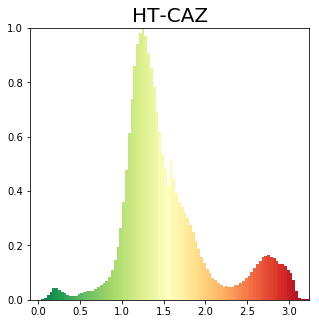

In [18]:
import matplotlib.patches as patches
def plot_distribution_color(ax,this_df,lrange,prop):
    cmap =cm.get_cmap('RdYlGn')   
    if prop=="phi_N01":
        cmap =cm.get_cmap('RdYlGn_r')   
    

    
    ax.set_xlim([lrange[0],lrange[-1]])
    ax.set_ylim([0,1])
    
    this_devs=this_df[prop]
    
    h,n=np.histogram(this_devs,lrange)
    maxh=np.max(h)
    h=[x/maxh for x in h]
    bin_size=n[1]-n[0]
    n=n[1:]-bin_size/2
   
    #print(len(h),len(n))
    
    for ib, b in enumerate(n):
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                h[ib],          # height
                facecolor=cmap((ib+1)/len(n))
            )
        )
    
    return ax




meanPhiN01=pop_df_plus_limits.phi_N01.mean()
maxPhiN01=pop_df_plus_limits.phi_N01.max()
minPhiN01=pop_df_plus_limits.phi_N01.min()


lrange=np.linspace(0-.1,np.pi+.1,101)




#plt=plot_phi_hist(pop_df_plus['phi_N01'],phi_range,expeLabel)
fig,ax=plt.subplots(figsize=(5,5))
prop='phi_N01'
ax=plot_distribution_color(ax,pop_df_plus,lrange,prop)
plt.title("%s"%(expeLabel))

plt.show()
plt.close()

In [15]:
frames2=[frame_experiment_start,frame_signal_start,int(frame_signal_start+(frame_signal_end-frame_signal_start)/2),frame_signal_end,frame_experiment_end]
frames2=[frame_experiment_start,frame_signal_start,int(frame_signal_start+(frame_signal_end-frame_signal_start)/2),frame_signal_end]
frames2

[55, 91, 109, 127]

In [ ]:

# outDir="%s2Dhist/"%figurePath
# if not os.path.exists(outDir):
#     os.mkdir(outDir)

def plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type):
    
    if(angle_type=="phi_N01"):
        rho_type="rho_N01"
    elif(angle_type=="phi_01"):
        rho_type="rho_01"
    ##poopulation data
    phis01=this_df[angle_type]
    rhos01=this_df[rho_type]
    #  meanPhi_Nrot,maxRho_N,meanRho_N  
    colors=cmap([1-x/np.pi for x in phis01])
    ax.scatter(phis01, rhos01,s=10,c=colors,alpha=alph)
    
    this_moments=st.describe(phis01)
    print(this_moments)
    
    
    lphimean=np.mean(phis01)
    lrhomean=np.mean(rhos01)
    
    phisrmode=[round(p,1) for p in phis01]
    rhosrmode=[round(r,1) for r in rhos01]
    p=st.mode(phisrmode)
    r=st.mode(rhosrmode)
    lphimode=p.mode[0]
    lrhomode=r.mode[0]

    
    ####population metrics
    if(ref_df.empty):
    
        ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
        ax.scatter(lphimode,lrhomode,s=30,c='b',zorder=3)

    if(not ref_df.empty):
        phis01=list(ref_df[angle_type])
        rhos01=list(ref_df[rho_type])
        refphimean=np.mean(phis01)
        refrhomean=np.mean(rhos01)
        #ax.scatter(refphimean,refrhomean,s=30,c='k',zorder=3)
        
        ax.annotate("", xy=(lphimean, lrhomean), xytext=(refphimean,refrhomean),  arrowprops=dict(arrowstyle="->",color='k',lw=1))
        
        phisrmode=[round(p,1) for p in phis01]
        rhosrmode=[round(r,1) for r in rhos01]
        p=st.mode(phisrmode)
        r=st.mode(rhosrmode)
        refphimode=p.mode[0]
        refrhomode=r.mode[0]
        #ax.scatter(refphimode,refrhomode,s=30,c='b',zorder=3)
        
        ax.annotate("", xy=(lphimode, lrhomode), xytext=(refphimode,refrhomode),  arrowprops=dict(arrowstyle="->",color='b',lw=1))
        
        
        
    ax.set_rmax(1)
    ax.set_rticks(ticks=[])
    ax.set_thetamin(-llim)
    ax.set_thetamax(180+llim)
    ax.grid(False)
    ax.set_thetagrids([0,90,180],labels=["G1","Plasmid Fraction","R12"])
    #ax.set_title("%s"%(pop), va='bottom')
    ax.set_title(name, va='bottom',fontweight='bold')
    ax.title.set_position([.5, .9])
    return ax
    
fig= plt.figure( figsize=(5*len(frames2), 5))    

ref_df=pd.DataFrame()
ref_df=pop_df_plus[pop_df_plus['frame']<frame_signal_start]
alph=.05
llim=5
Ncolors=50
cmap = cm.get_cmap("RdYlGn", Ncolors)
angle_type="phi_N01"    


for ti,t, in enumerate(frames2):
    name="%s"%t
    axist="1%s%s"%(len(frames2),ti+1)
    ax=fig.add_subplot(axist,projection='polar') 
    #filter_t=filterFrames(data_frame, [t])
    this_df=pop_df_plus[pop_df_plus['frame']==t]
    
    plot_polar_fancy(ax,this_df,ref_df,alph,llim,name,angle_type)

plt.show()
print("Saved as %s%s_2Dhist_<pos>_<t>.tif"%(outDir, expeLabel))

In [ ]:
Ncolors=11
cmap = cm.get_cmap("RdYlGn", Ncolors)
cmap_r= cm.get_cmap("RdYlGn_r", Ncolors)


normed=True
bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.05]
binsf=[x*np.pi for x in bins]
print(binsf)

times=frames_list
time_freqs=[]
dcolor=[1-x for x in bins]

colorsl=cmap(dcolor)
for ti,t, in enumerate(times):

    this_df=pop_df_plus[pop_df_plus['frame']==t]
    this_data=this_df['phi_01']
    n,bins,patches=plt.hist(this_data,bins=binsf)#,density='true')
    plt.close()
    tots=sum(n)
    this_freqs=[x for x in n]
    if(normed):
        this_freqs=[x/tots for x in n]
    time_freqs.append(this_freqs)

#time_freqs
#print(time_freqs)
freqs_time=np.zeros((len(time_freqs[0]),len(time_freqs)))

for ti,tfs in enumerate(time_freqs):
    for fi,ft in enumerate(tfs):
        freqs_time[fi][ti]=ft
#print(freqs_time)


#fig= plt.figure( figsize=(10, 5))    
fig,ax=plt.subplots(figsize=(15, 5))
#sc=ax.scatter(binsf,binsf,color=colorsl)
cs = ax.contourf([binsf, bins],cmap=cmap_r)
ax.clear()
ax.stackplot(times,freqs_time,colors=colorsl)
plt.xlabel("Time frames")
plt.ylabel("Normalized frequency")
#plt.colorbar()



cb = plt.colorbar(cs, cmap=cmap)
bcticks=np.linspace(cs.get_array().min(), cs.get_array().max(), 2)
cb.set_ticks(bcticks)
#cb.set_ticklabels(np.linspace(0, round(np.pi,2), 2))
cb.set_ticklabels(["G1","R12"])
cb.set_label('Plasmid frequency',fontsize=14)
#plt.colorbar(sc,ax=ax,ticks=binsf,label="x")
#plt.clim(0, np.pi)
plt.title(expeLabel)

plt.show()

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')